In [1]:
from processing import msevn
import os
import numpy as np
import scipy
import re

msevn.configure_mpl()

In [2]:
import re

root = './matlab/output/wavepacket'

dphi = np.linspace(0, 180, 30)
dtheta0_90 = np.linspace(0, 90, 31)
#dtheta90_180 = np.linspace(90, 180, 25)

eint0_90_global = np.zeros(shape=(dtheta0_90.size, dphi.size))
#eint90_180_global = np.zeros(shape=(dtheta90_180.size, dphi.size))

files = filter(lambda x: x.endswith('.mat'), os.listdir(root))

eint_storage = {}

for fname in files:

    wavelength = float(re.search(r'[\d\.]+(?=wav)', fname).group())
    #radius = float(re.search(r'\d+(?=radius)', fname).group())
    #theta0 = float(re.search(r'\d+(?=deg_theta0)', fname).group())

    eint0_90 = msevn.mstm_est.e_int(
            matpath=os.path.join(root, fname),
            dphi=dphi,
            dtheta=dtheta0_90,
            thickness=msevn.mstm_est.thickness(16, 180, 50),
            mean_mode=False
        )

    #eint0_90_global += get_rel_amp(wavelength)**2 * eint0_90
    #eint_storage[radius] = eint0_90
    #eint_storage[theta0] = eint0_90
    eint_storage[wavelength] = eint0_90

100%|██████████| 30/30 [05:19<00:00, 10.66s/it]


In [3]:
def normal_distr(x, mu, sigma):
    scaler = 1 / (2 * np.pi * sigma ** 2) ** 0.5
    mmas = np.exp(- (x - mu) ** 2 / sigma ** 2 / 2)
    return scaler * mmas


wavepack = lambda x: normal_distr(x, mu=83, sigma=13) / normal_distr(83, mu=83, sigma=13)

In [4]:
total = sum([wavepack(k) * v for k, v in eint_storage.items()])

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


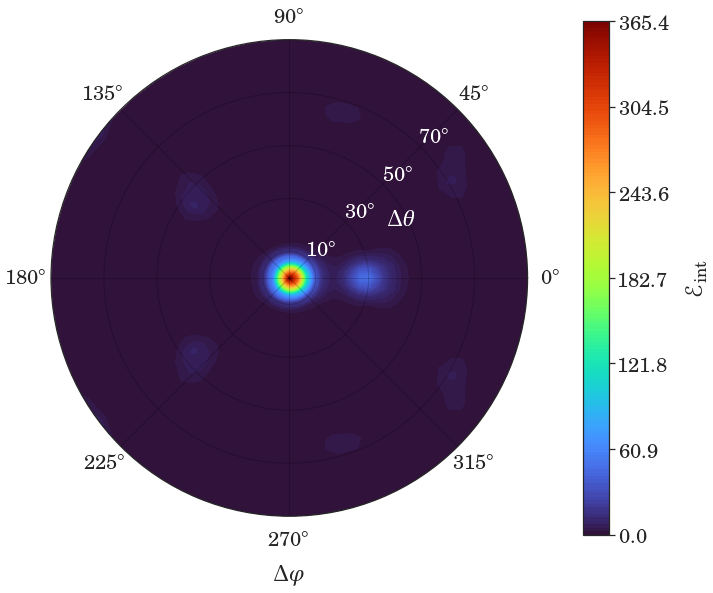

In [6]:
fig = msevn.mstm_polar_plot.e_int(total / total.max() * 365.4, kind='t', dtheta=dtheta0_90, dphi=dphi, symmertry=True, cbarlabel=r'$\EuScript{E}_{\rm{int}}$')
fig.savefig('../tex/components/img/celes/E_squared/eint_wavepacket2_15deg_0.0nonreg.pdf', bbox_inches='tight')